In [81]:
import pandas as pd
import numpy as np
import os
print(os.getcwd())

D:\OneDrive - LTI\LTI\Projects\DCP\Tasks\9Leakdetection


In [87]:
craneData = pd.read_csv("Data/Crane1.csv")

In [88]:
craneData.columns.values

array(['Date', '04892-00', '18135-00', '18463-00', '18464-00', '18466-00',
       '31863-00', '31888-00', '31954-00', 'L_N_U'], dtype=object)

In [89]:
craneData.head()

,Date,04892-00,18135-00,18463-00,18464-00,18466-00,31863-00,31888-00,31954-00,L_N_U
0,1/31/2017,7.49,12.90,20.04,13.69,13.00,12.60,12.35,15.30,-526
1,2/1/2017,6.31,13.46,20.54,14.34,13.48,13.14,12.89,16.42,-508
2,2/2/2017,7.06,16.67,21.96,17.58,16.72,16.75,16.53,18.87,-723
3,2/3/2017,7.19,17.09,21.75,17.89,17.19,16.89,16.67,19.65,-638
4,2/4/2017,6.89,16.62,21.36,17.44,16.74,16.29,16.08,18.91,-685


In [90]:
craneData['Date'] = pd.to_datetime(craneData['Date'])

In [91]:
craneData.set_index('Date', inplace=True)

In [92]:
craneData.head()

,04892-00,18135-00,18463-00,18464-00,18466-00,31863-00,31888-00,31954-00,L_N_U
Date,,,,,,,,,
2017-01-31,7.49,12.90,20.04,13.69,13.00,12.60,12.35,15.30,-526
2017-02-01,6.31,13.46,20.54,14.34,13.48,13.14,12.89,16.42,-508
2017-02-02,7.06,16.67,21.96,17.58,16.72,16.75,16.53,18.87,-723
2017-02-03,7.19,17.09,21.75,17.89,17.19,16.89,16.67,19.65,-638
2017-02-04,6.89,16.62,21.36,17.44,16.74,16.29,16.08,18.91,-685


In [93]:
craneData10days = craneData.loc['2017-06-05':'2017-06-15']

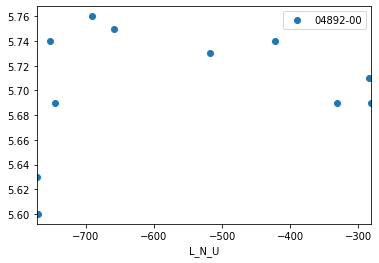

In [97]:
craneData10days.plot('L_N_U', y='04892-00', style='o')

In [94]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(craneData10days)

In [95]:
# Compute DBSCAN
db = DBSCAN(eps=0.1, min_samples=2).fit(X_scaled)

In [96]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 0
Estimated number of noise points: 11
